# Face_recognition 

### https://github.com/timesler/facenet-pytorch/tree/master
### https://www.kaggle.com/code/timesler/guide-to-mtcnn-in-facenet-pytorch/notebook

### 안면 인식 모델 환경 세팅
### 1. 가상 환경 생성 : conda create -n 환경이름 python==3.10
### 2. torch만 conda로 설치 : conda install pytorch torchvision torchaudio pytorch-cuda=11.8 -c pytorch -c nvidia
### 3. pip install facenet-pytorch
### 4. pip install matplotlib, pip install tqdm 등

# 실행 코드 

### 1) 모델 선언 (output 이미지 사이즈 입력)
### 2) 입력 이미지 입력 (image_path)
### 3) 입력된 이미지의 안면 검출
### 4) 검출된 n개의 이미지 시간대별 저장 (/data/recog_images)

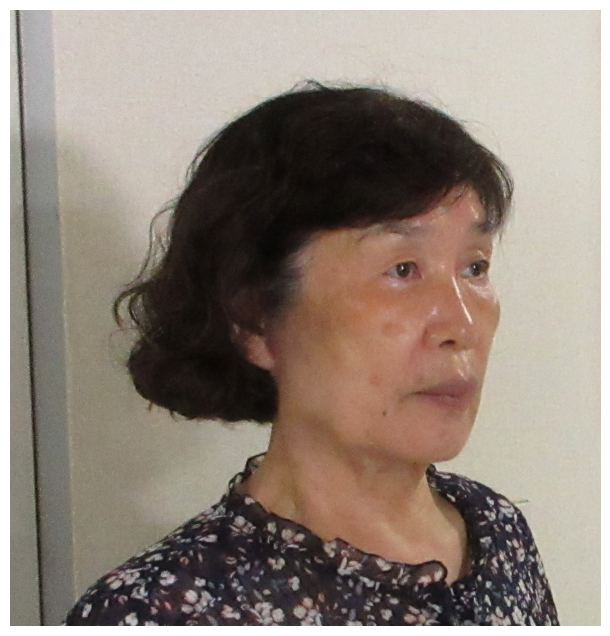

Face Detect : 1
['./data/recog_images/2023-07-17-20-15-59\\face.png']


In [8]:
# 이미지 1장 촬영 후 저장

from facenet_pytorch import MTCNN
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from datetime import datetime
from glob import glob 

# 모델 선언
mtcnn = MTCNN(image_size=224,margin=60, keep_all=True, post_process=False, device='cuda:0',)

# 현재 프로젝트에서는 영상X
# Load a single image and display
# v_cap = cv2.VideoCapture('/kaggle/input/deepfake-detection-challenge/train_sample_videos/avibnnhwhp.mp4')
# success, frame = v_cap.read()

# 저장된 이미지
image_path = './data/test_images/test4.jpg'

frame = Image.open(image_path)
frame = np.array(frame)

# BGR 그대로
# frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
# frame = Image.fromarray(frame)

# 이미지 확인
plt.figure(figsize=(12, 8))
plt.imshow(frame)
plt.axis('off')
plt.show()


# 안면 검출 이미지 저장 경로
recog_path = './data/recog_images/'

# 현재 시간
now = datetime.now()
now_path = str(now.date())+'-'+str(now.hour)+'-'+str(now.minute)+'-'+str(now.second)

# face detect 모델 실행, 결과 저장(save_path=현재시간+n개)
faces = mtcnn(frame,save_path=recog_path+now_path+'/face.png')

# 검출된 안면 갯수
print("Face Detect : " + str(len(faces)))

# Multi Label 해야하는 이미지들
recog_images = glob(recog_path+now_path+'/*.png')
print(recog_images)

TypeError: 'Axes' object is not iterable

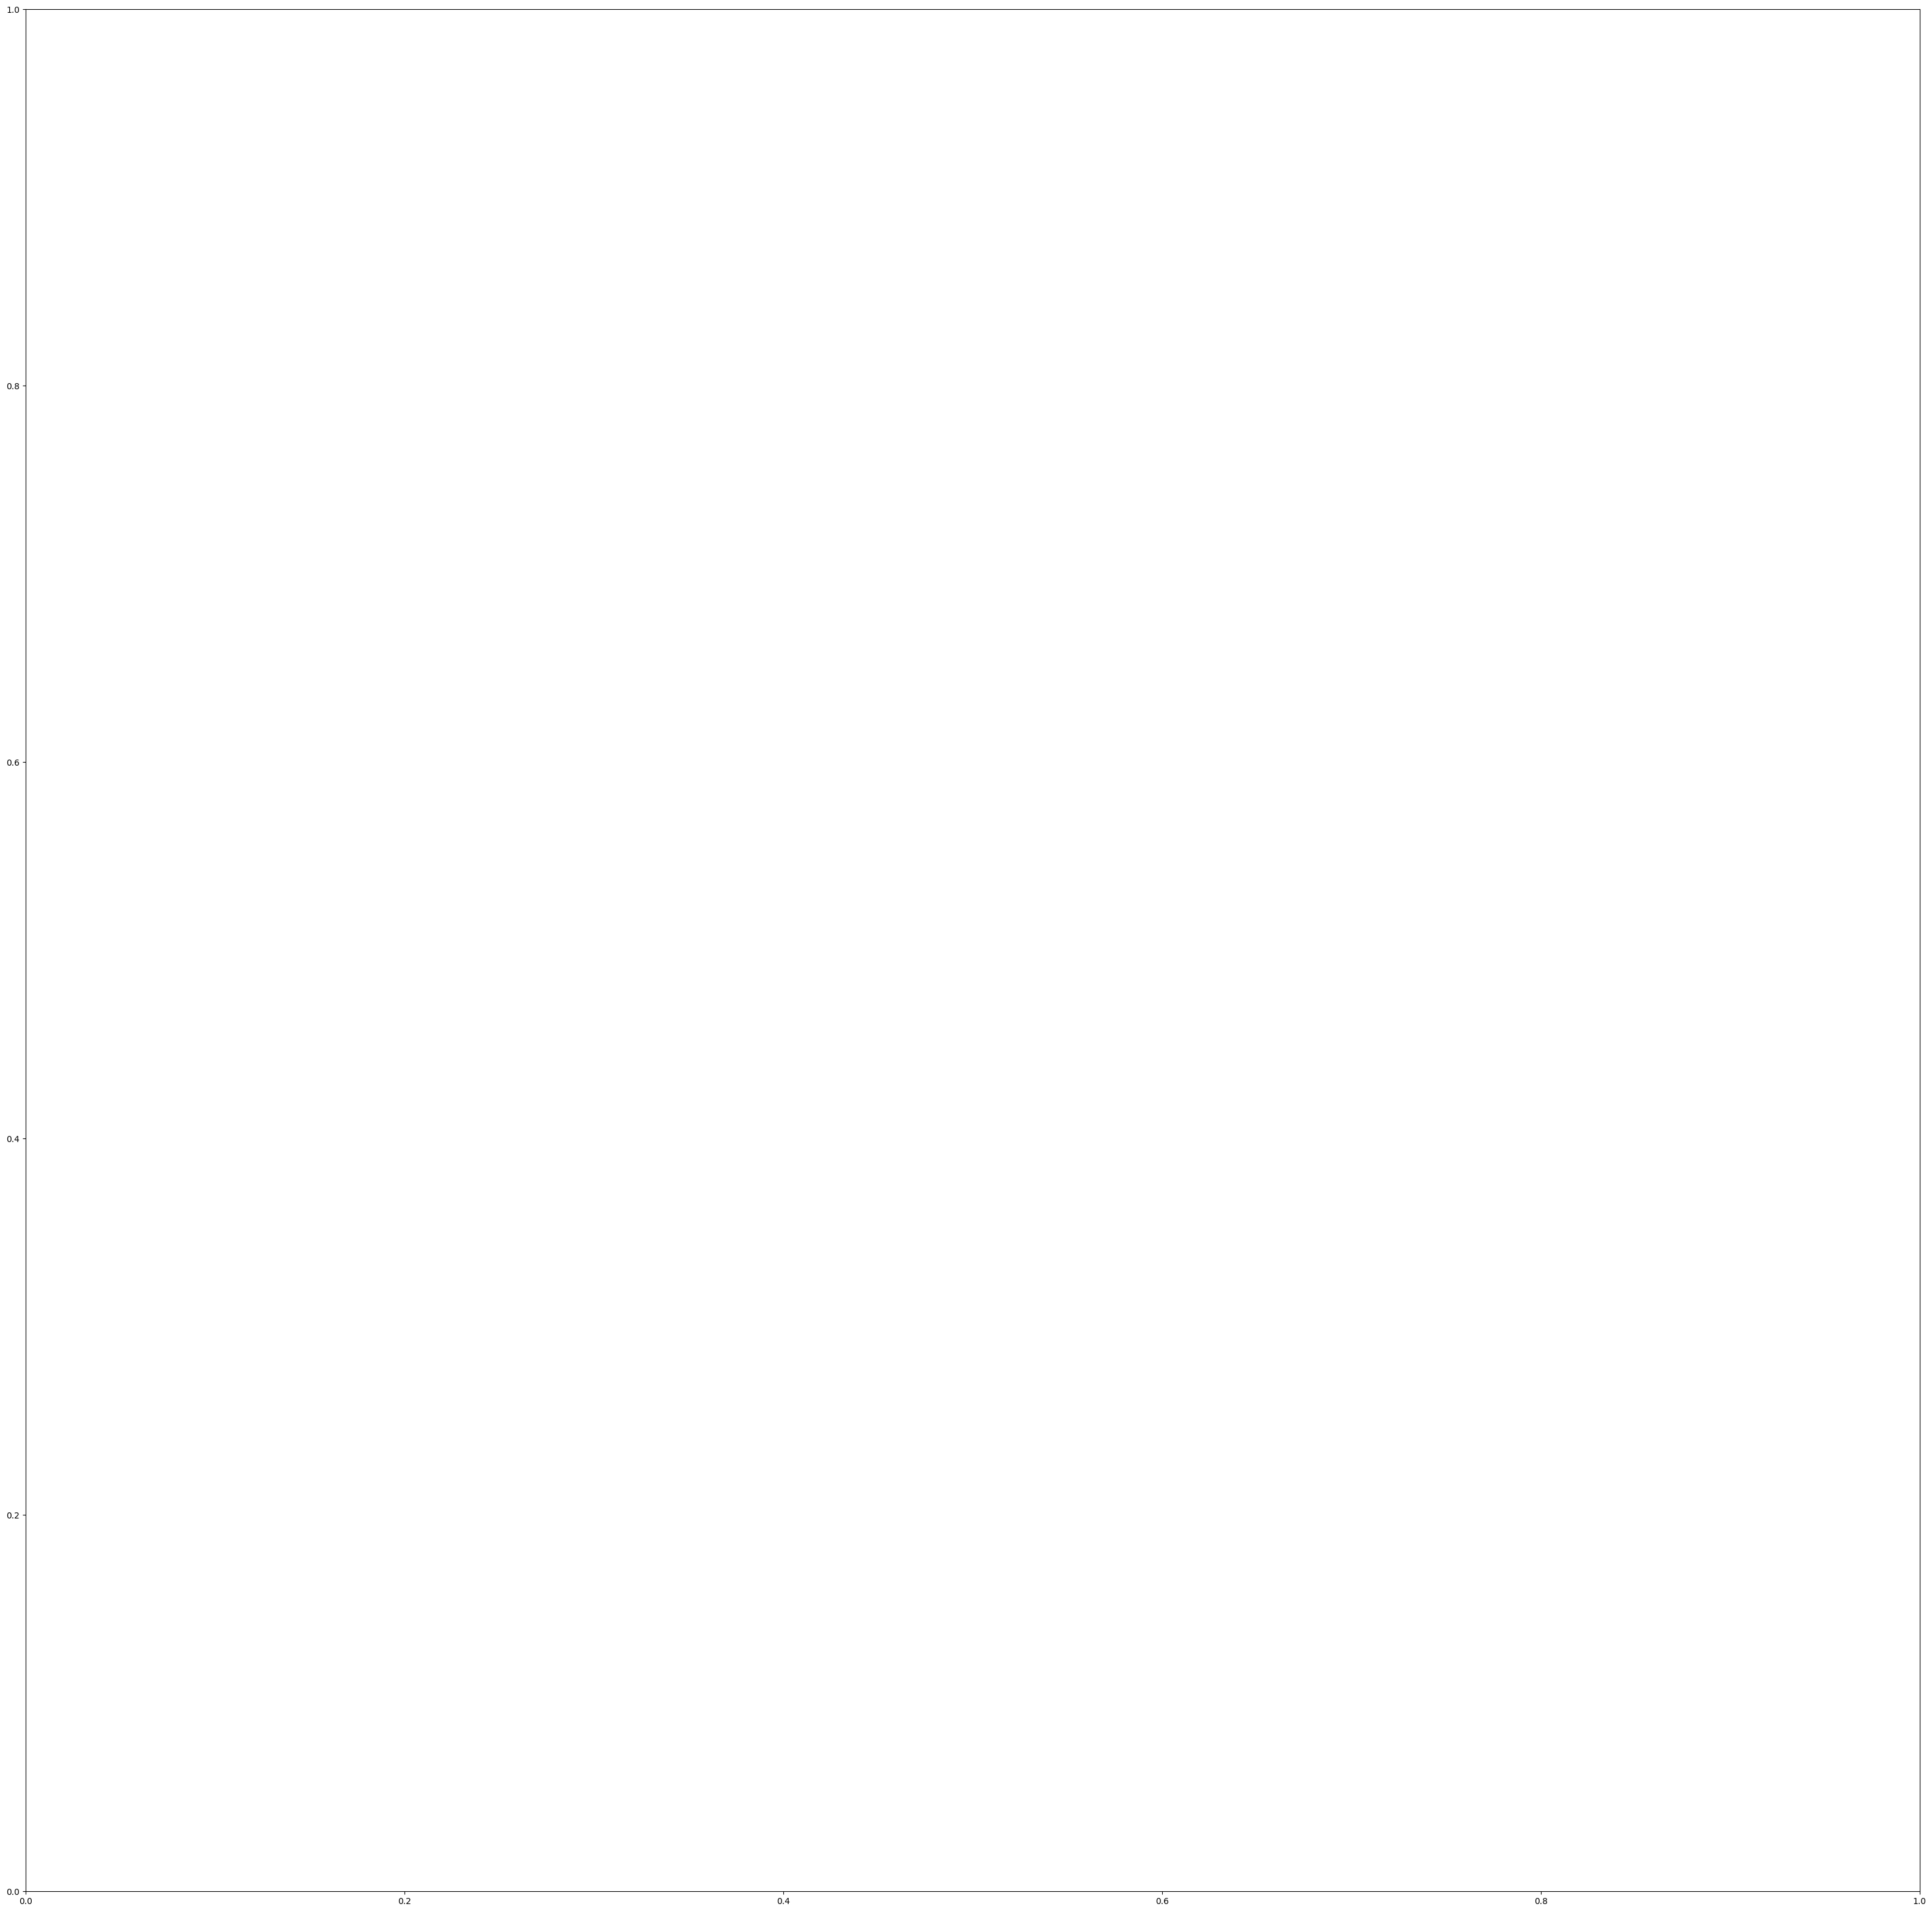

In [7]:
# 검출된 안면 이미지 확인

fig, axes = plt.subplots(1, len(faces),figsize=(40,40))
for face, ax in zip(faces, axes):
    ax.imshow(face.permute(1, 2, 0).int().numpy())
    ax.axis('off')
fig.show()